# Creación de neurona con dos nodos
artificial para ETH


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print("TensorFlow version:", tf.__version__)
print("Verion 1.1.0 del algoritmo")

TensorFlow version: 2.20.0
Verion 1.1.0 del algoritmo


## Descargar datos de Ethereum

In [2]:
# Descargar datos históricos de Ethereum
eth = yf.download('ETH-USD', start='2020-01-01', end='2025-10-20')

# Mostrar las primeras filas
print(eth.head())
print("\nForma de los datos:", eth.shape)

C:\Users\raton\AppData\Local\Temp\ipykernel_8224\3822267417.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download('ETH-USD', start='2020-01-01', end='2025-10-20')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open       Volume
Ticker         ETH-USD     ETH-USD     ETH-USD     ETH-USD      ETH-USD
Date                                                                   
2020-01-01  130.802002  132.835358  129.198288  129.630661   7935230330
2020-01-02  127.410179  130.820038  126.954910  130.820038   8032709256
2020-01-03  134.171707  134.554016  126.490021  127.411263  10476845358
2020-01-04  135.069366  136.052719  133.040558  134.168518   7430904515
2020-01-05  136.276779  139.410202  135.045624  135.072098   7526675353

Forma de los datos: (2119, 5)


## Preprocesamiento de datos

In [3]:
# Usaremos solo el precio de cierre
data = np.log(eth[['Close']].values)

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Crear secuencias para entrenamiento
def create_sequences(data, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 300
X, y = create_sequences(data_scaled, sequence_length)

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Forma de X: (1819, 300)
Forma de y: (1819,)


## Definir la estructura de una sola neurona

In [4]:
# UNA SOLA NEURONA usando TensorFlow
class SingleNeuronWithTwoHiddenNodes:
    def __init__(self, input_dim):
        # Capa oculta con 2 nodos
        self.W1 = tf.Variable(tf.random.normal([input_dim, 2], stddev=0.1), name='W1')
        self.b1 = tf.Variable(tf.zeros([2]), name='b1')

        # Capa de salida (1 nodo)
        self.W2 = tf.Variable(tf.random.normal([2, 1], stddev=0.1), name='W2')
        self.b2 = tf.Variable(tf.zeros([1]), name='b2')

    def __call__(self, x):
        # Capa oculta con activación ReLU
        hidden = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
        # Capa de salida
        output = tf.matmul(hidden, self.W2) + self.b2
        return output

    def get_weights(self):
        return {
            "W1": self.W1.numpy(),
            "b1": self.b1.numpy(),
            "W2": self.W2.numpy(),
            "b2": self.b2.numpy()
        }


# Crear la neurona
neurona = SingleNeuronWithTwoHiddenNodes(input_dim=sequence_length)
print("Neurona creada exitosamente!")
pesos = neurona.get_weights()
print("Pesos iniciales capa 1 (W1):", pesos["W1"])
print("Sesgo capa 1 (b1):", pesos["b1"])
print("Pesos capa salida (W2):", pesos["W2"])
print("Sesgo capa salida (b2):", pesos["b2"])



Neurona creada exitosamente!
Pesos iniciales capa 1 (W1): [[-6.93391031e-03 -3.66751589e-02]
 [ 2.00856812e-02 -4.91792187e-02]
 [-3.71497534e-02  1.18969075e-01]
 [-1.05134726e-01 -5.57923801e-02]
 [-2.84096505e-02 -1.41880903e-02]
 [ 1.71536133e-01  9.54575986e-02]
 [-3.41922831e-04  1.96858849e-02]
 [ 7.23078027e-02  1.67011961e-01]
 [ 9.62326862e-03 -1.04698196e-01]
 [ 1.51341602e-01  5.71617186e-02]
 [ 4.31908481e-02  1.12580135e-01]
 [-4.77478653e-02  1.91317014e-02]
 [-2.11083163e-02  5.58108352e-02]
 [ 2.79353093e-02 -2.29012016e-02]
 [-2.78589167e-02 -7.45058879e-02]
 [ 1.24128461e-02  2.02753618e-01]
 [-4.64734398e-02  4.20375280e-02]
 [-6.56318888e-02  5.34048043e-02]
 [-7.59266838e-02  1.27090320e-01]
 [ 1.83550939e-02 -1.70904901e-02]
 [ 3.95232663e-02  2.24439730e-03]
 [-1.26384035e-01 -9.73807573e-02]
 [-2.92423274e-02  9.14374739e-02]
 [ 2.24536687e-01  1.22774981e-01]
 [-4.55610864e-02 -6.16923682e-02]
 [ 8.92584920e-02  5.61241098e-02]
 [ 1.61713108e-01  1.12059593e-0

## Función de pérdida y optimizador

In [5]:
# Función de pérdida (Error Cuadrático Medio)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Optimizador (Descenso de Gradiente)
optimizer = tf.optimizers.Adam(learning_rate=0.01)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (1799, 300)
Datos de prueba: (20, 300)


## Entrenamiento de la neurona

In [6]:
# Historial de pérdidas
train_losses = []
test_losses = []

# Entrenamiento
epochs = 2000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = neurona(X_train.astype(np.float32))
        loss = loss_fn(y_train.astype(np.float32), y_pred)

    # Backward pass
    gradients = tape.gradient(loss, [neurona.W1, neurona.b1, neurona.W2, neurona.b2])
    optimizer.apply_gradients(zip(gradients, [neurona.W1, neurona.b1, neurona.W2, neurona.b2]))


    # Calcular pérdida en test
    y_test_pred = neurona(X_test.astype(np.float32))
    test_loss = loss_fn(y_test.astype(np.float32), y_test_pred)

    if epoch > 0 and test_loss.numpy() > test_losses[-1]:
        print(f"Epoch {epoch}: Loss: {test_loss.numpy()}")
        break

    train_losses.append(loss.numpy())
    test_losses.append(test_loss.numpy())

    if epoch % 20 == 0:
        print(f"Época {epoch}: Pérdida entrenamiento = {loss.numpy():.6f}, Pérdida prueba = {test_loss.numpy():.6f}")

print("\n¡Entrenamiento completado!")

Época 0: Pérdida entrenamiento = 0.673040, Pérdida prueba = 0.466615
Epoch 4: Loss: 0.09617465734481812

¡Entrenamiento completado!


## Visualización del entrenamiento

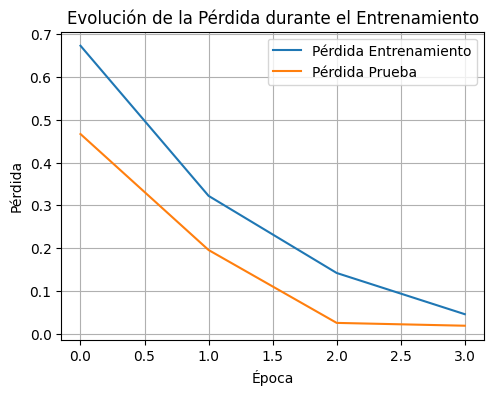

In [7]:
plt.figure(figsize=(12, 4))

# Gráfico de pérdidas
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida Entrenamiento')
plt.plot(test_losses, label='Pérdida Prueba')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Predicciones

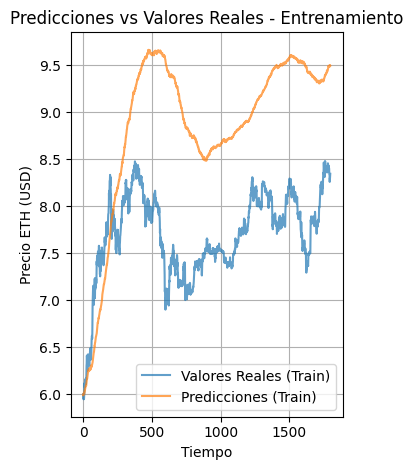

In [8]:
# Hacer predicciones
y_pred_train = neurona(X_train.astype(np.float32))
y_pred_test = neurona(X_test.astype(np.float32))

# Desnormalizar las predicciones
y_pred_train_actual = scaler.inverse_transform(y_pred_train.numpy())
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

# Gráfico de predicciones vs valores reales
plt.subplot(1, 2, 2)
plt.plot(y_train_actual, label='Valores Reales (Train)', alpha=0.7)
plt.plot(y_pred_train_actual, label='Predicciones (Train)', alpha=0.7)
plt.title('Predicciones vs Valores Reales - Entrenamiento')
plt.xlabel('Tiempo')
plt.ylabel('Precio ETH (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Predicción del siguiente precio

In [9]:
# Usar los últimos 'sequence_length' días para predecir el siguiente
ultimos_datos = data_scaled[-sequence_length:].flatten().reshape(1, -1)

# Hacer la predicción
prediccion_normalizada = neurona(ultimos_datos.astype(np.float32))
prediccion = scaler.inverse_transform(prediccion_normalizada.numpy())

print(f"\n=== PREDICCIÓN DE LA NEURONA ===")
print(f"Último precio real: ${data[-1][0]:.2f}")
print(f"Predicción del siguiente precio: ${prediccion[0][0]:.2f}")
print(f"Pesos finales de la neurona: {neurona.get_weights()[0].flatten()}")
print(f"Sesgo final: {neurona.get_weights()[1][0]:.6f}")


=== PREDICCIÓN DE LA NEURONA ===
Último precio real: $8.29
Predicción del siguiente precio: $9.52


KeyError: 0

# Evaluación del modelo

In [15]:
# Calcular métricas de error
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_test_actual = scaler.inverse_transform(y_pred_test.numpy())

mae = mean_absolute_error(y_test_actual, y_pred_test_actual)
mse = mean_squared_error(y_test_actual, y_pred_test_actual)
rmse = np.sqrt(mse)

print(f"\n=== MÉTRICAS DE EVALUACIÓN ===")
print(f"Error Absoluto Medio (MAE): ${mae:.2f}")
print(f"Error Cuadrático Medio (MSE): ${mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse:.2f}")

ValueError: y_true and y_pred have different number of output (1!=2)